# Microsft Bing Image Search Download

Using Microsoft Bing to download images of different foods.

Source: https://docs.microsoft.com/en-us/azure/cognitive-services/bing-image-search/quickstarts/python

**Note:** The docs link above says to use `"https://api.cognitive.microsoft.com/bing/v7.0/images/search"` as the search API URL but due to API changes, the correct link to use is `"https://api.bing.microsoft.com/v7.0/images/search"`. This is true for API instances made after October 30, 2020.

In [1]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import streamlit as st

subscription_key = st.secrets["microsoft_bing_image_search_key"]

# search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search" # OLD
search_url = "https://api.bing.microsoft.com/v7.0/images/search" # New (after Oct 30, 2020)


2021-10-28 12:49:45.013 INFO    numexpr.utils: Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-10-28 12:49:45.014 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [3]:
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}

## Create and send a search request

In [4]:
search_term = "apple"

# See list of params here - https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters 
params = {
    "q": search_term,
    "license": "public",
    "imageType": "photo"
}

In [5]:
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status() # used for debugging
search_results = response.json()

# Get first 16 thumbnail URLs
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:16]]

In [6]:
search_results

{'_type': 'Images',
 'instrumentation': {'_type': 'ResponseInstrumentation'},
 'readLink': 'https://api.bing.microsoft.com/api/v7/images/search?q=apple',
 'webSearchUrl': 'https://www.bing.com/images/search?q=apple&FORM=OIIARP',
 'queryContext': {'originalQuery': 'apple',
  'alterationDisplayQuery': 'apple',
  'alterationOverrideQuery': '+apple',
  'alterationMethod': 'AM_JustChangeIt',
  'alterationType': 'CombinedAlterationsChained'},
 'totalEstimatedMatches': 614,
 'nextOffset': 41,
 'currentOffset': 0,
 'value': [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=apple&id=CE5507F1751FDCB90880EB8422A21B8515FDBB0C&simid=608018587312661112',
   'name': 'Free picture: fruit, food, leaf, delicious, nature, red ...',
   'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.yKPRhaz6pwHrVdgvlM5AJQHaE8&pid=Api',
   'datePublished': '2017-11-15T17:42:00.0000000Z',
   'isFamilyFriendly': True,
   'creativeCommons': 'PublicNoRightsReserved',
   'contentUrl': 'https:

In [7]:
# The length of "value" parameter will be set by the "count" parameter:
# see: https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters
# Min: 35, Max: 150
len(search_results["value"])

35

In [14]:
search_results["value"][0]

{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=apple&id=CE5507F1751FDCB90880EB8422A21B8515FDBB0C&simid=608018587312661112',
 'name': 'Free picture: fruit, food, leaf, delicious, nature, red ...',
 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.yKPRhaz6pwHrVdgvlM5AJQHaE8&pid=Api',
 'datePublished': '2017-11-15T17:42:00.0000000Z',
 'isFamilyFriendly': True,
 'creativeCommons': 'PublicNoRightsReserved',
 'contentUrl': 'https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg',
 'hostPageUrl': 'https://pixnio.com/flora-plants/fruits/apple-pictures/fruit-food-leaf-delicious-nature-red-apple-sweet-orchard',
 'contentSize': '491942 B',
 'encodingFormat': 'jpeg',
 'hostPageDisplayUrl': 'https://pixnio.com/flora-plants/fruits/apple-pictures/fruit-food-leaf-delicious-nature...',
 'width': 5820,
 'height': 3880,
 'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.ebmCsBYcSRoMwPCSPrE3ZQ&pid=Api',
 'hostPageDiscoveredDate': '2017-11-14T00:00:00.000

In [16]:
# We can save metadata from our image so we can look it up later
attributes_from_value = ["width", "height", "contentURL"] 
attributes_to_create = ["date_created", "source"]

In [18]:
# Get current time
import datetime
current_time = datetime.datetime.now().strftime(
                "%Y-%m-%d %H:%M:%S"
            )
current_time

'2021-10-28 13:02:49'

## View images

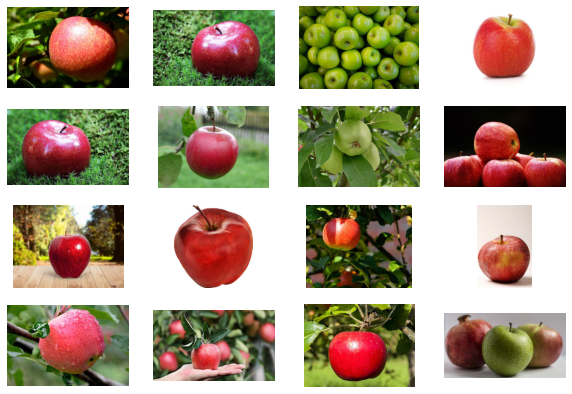

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(10, 7))
for i in range(4):
    for j in range (4):
        image_data = requests.get(thumbnail_urls[i+4*j]) # downloads as bytes
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

## Downloading an image

In [ ]:
image = requests.get("https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg")
open("downloaded_img.jpg", "wb").write(image.content)

## Getting URLs for multiple images (for different search terms)

Let's write some code to get a bunch of images downloaded (we can turn the following into a script later).

In [12]:
search_terms = ['apple',
 'banana',
 'beef',
 'blueberries',
 'carrots',
 'chicken_wings',
 'egg',
 'honey',
 'mushrooms',
 'strawberries']

In [19]:
import requests
import matplotlib.pyplot as plt
import streamlit as st

from PIL import Image
from io import BytesIO

API_KEY = st.secrets["microsoft_bing_image_search_key"]
SEARCH_URL = "https://api.bing.microsoft.com/v7.0/images/search"

# Number of images per page
COUNT = 100 # min 35, max 150, see "count" - https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters

headers = {"Ocp-Apim-Subscription-Key" : API_KEY}

# TODO
* Batch save images
* Batch delete images
* Add image metadata to CSV (for logging and exporting later)

In [26]:
import uuid
img_to_download_list = []
for search_term in search_terms:

    print(f"\n### Searching for {search_term} images...")
    params = {
        "q": search_term,
        "license": "public",
        "imageType": "photo",
        "count": COUNT
    }
    
    response = requests.get(SEARCH_URL, 
                            headers=headers, 
                            params=params)
    response.raise_for_status() # used for debugging
    search_results = response.json()

    print(f"Found {search_results['totalEstimatedMatches']} potential image matches...")
    print("Appending image URLs to dictionary... \n")
    for i, value in enumerate(search_results["value"]):
        img_metadata = {}

        # Give each image a UUID
        img_metadata["image_id"] = str(uuid.uuid4())

        # State the source of the image
        img_metadata["source"] = "microsoft_bing_image_search_api_v7"
        
        # Collect metadata about each image
        img_metadata["search_term"] = search_term
        img_metadata["img_url"] = value["contentUrl"]
        img_metadata["height"] = value["height"]
        img_metadata["width"] = value["width"]
        img_metadata["time_downloaded"] = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        
        img_to_download_list.append(img_metadata)
        if i % 50 == 0:
            print(f"Adding image url for {search_term}: {img_url}...")

img_to_download_list


### Searching for apple images...
Found 614 potential image matches...
Appending image URLs to dictionary... 

Adding image url for apple: https://pixnio.com/free-images/2019/06/18/2019-06-18-11-11-54.jpg...
Adding image url for apple: https://pixnio.com/free-images/2019/06/18/2019-06-18-11-11-54.jpg...

### Searching for banana images...
Found 628 potential image matches...
Appending image URLs to dictionary... 

Adding image url for banana: https://pixnio.com/free-images/2019/06/18/2019-06-18-11-11-54.jpg...
Adding image url for banana: https://pixnio.com/free-images/2019/06/18/2019-06-18-11-11-54.jpg...

### Searching for beef images...
Found 732 potential image matches...
Appending image URLs to dictionary... 

Adding image url for beef: https://pixnio.com/free-images/2019/06/18/2019-06-18-11-11-54.jpg...
Adding image url for beef: https://pixnio.com/free-images/2019/06/18/2019-06-18-11-11-54.jpg...

### Searching for blueberries images...
Found 643 potential image matches...
Appe

[{'image_id': '7aeda53b-1a4c-4922-ad61-0b8f1af8cacd',
  'source': 'microsoft_bing_image_search_api_v7',
  'search_term': 'apple',
  'img_url': 'https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg',
  'height': 3880,
  'width': 5820,
  'time_downloaded': '2021-10-28 13:20:46'},
 {'image_id': '782b3d85-7cdc-4ac3-bb2b-1eed2324cc20',
  'source': 'microsoft_bing_image_search_api_v7',
  'search_term': 'apple',
  'img_url': 'https://pixnio.com/free-images/2018/07/01/2018-07-01-16-50-29.jpg',
  'height': 2264,
  'width': 3600,
  'time_downloaded': '2021-10-28 13:20:46'},
 {'image_id': '5ea7c93c-02c9-4838-85e4-7b393e47066c',
  'source': 'microsoft_bing_image_search_api_v7',
  'search_term': 'apple',
  'img_url': 'https://images.pexels.com/photos/211352/pexels-photo-211352.png?cs=srgb&dl=apple-apples-fruit-fruits-211352.jpg&fm=jpg',
  'height': 1607,
  'width': 1530,
  'time_downloaded': '2021-10-28 13:20:46'},
 {'image_id': '943a9459-5417-4115-becd-a5c448de9a19',
  'source': 'micr

In [27]:
import pandas as pd
targ_img_df = pd.DataFrame(img_to_download_list)
targ_img_df

,image_id,source,search_term,img_url,height,width,time_downloaded
0,7aeda53b-1a4c-4922-ad61-0b8f1af8cacd,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2017/11/10/2017...,3880,5820,2021-10-28 13:20:46
1,782b3d85-7cdc-4ac3-bb2b-1eed2324cc20,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2018/07/01/2018...,2264,3600,2021-10-28 13:20:46
2,5ea7c93c-02c9-4838-85e4-7b393e47066c,microsoft_bing_image_search_api_v7,apple,https://images.pexels.com/photos/211352/pexels...,1607,1530,2021-10-28 13:20:46
3,943a9459-5417-4115-becd-a5c448de9a19,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2017/12/10/2017...,2820,4226,2021-10-28 13:20:46
4,82c9a389-7ac6-4043-a404-856d97608b1e,microsoft_bing_image_search_api_v7,apple,http://www.public-domain-image.com/free-images...,1536,2048,2021-10-28 13:20:46
...,...,...,...,...,...,...,...
995,171a0679-a219-4b8a-a08d-1d5e7e9434d5,microsoft_bing_image_search_api_v7,strawberries,https://images.pexels.com/photos/248420/pexels...,5760,3840,2021-10-28 13:20:59
996,21347ed7-25cc-4389-a8f5-4bf10d4fc4e3,microsoft_bing_image_search_api_v7,strawberries,https://images.pexels.com/photos/254773/pexels...,2592,3888,2021-10-28 13:20:59
997,d03a665f-7808-4f76-9f2e-621aea6cc5f5,microsoft_bing_image_search_api_v7,strawberries,https://images.pexels.com/photos/1147993/pexel...,6000,4000,2021-10-28 13:20:59
998,ff68ee91-aea7-4a2f-a1c8-e878f9dc7a67,microsoft_bing_image_search_api_v7,strawberries,https://images.pexels.com/photos/555503/pexels...,3000,4512,2021-10-28 13:20:59


In [30]:
targ_img_df.to_csv("target_images_metadata.csv")

In [21]:
len(img_class_urls_dict["beef"])

100

## Downloading data for multiple URLs

Now we have a bunch of URLs, let's download data.

In [41]:
!ls 10_whole_foods

apple         beef          carrot        egg           mushrooms
banana        blueberries   chicken_wings honey         strawberries


In [28]:
# List of exceptions, source: https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/
from requests import exceptions
EXCEPTIONS = set([IOError, FileNotFoundError,
	exceptions.RequestException, exceptions.HTTPError,
	exceptions.ConnectionError, exceptions.Timeout])

In [29]:
img_to_download_list[0]

{'image_id': '7aeda53b-1a4c-4922-ad61-0b8f1af8cacd',
 'source': 'microsoft_bing_image_search_api_v7',
 'search_term': 'apple',
 'img_url': 'https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg',
 'height': 3880,
 'width': 5820,
 'time_downloaded': '2021-10-28 13:20:46'}

## Download images

In [32]:
import os
import uuid

os.makedirs("10_whole_foods_test", exist_ok=True)
target_dir = "10_whole_foods_test"

# Make target dirs
for search_term in search_terms: 
    os.makedirs(os.path.join(target_dir, search_term))

# Download images...
print(f"Attempting to download {len(img_to_download_list)} images... \n")
for i, img_dict in enumerate(img_to_download_list):
    i += 1
    img_id = img_dict["image_id"]
    img_url = img_dict["img_url"]
    search_term = img_dict["search_term"]
    try:
        # Get the image
        img_data = requests.get(img_url, timeout=30)

        # Write image to file
        class_dir = os.path.join(target_dir, search_term)
        save_path = os.path.join(class_dir, 
                                 img_id + ".jpg")
        f = open(save_path, "wb")
        f.write(img_data.content)
        f.close()
    
    # If the image doesn't download, skip it 
    except Exception as e:
        if type(e) in EXCEPTIONS:
            print(f"Skipping image: {img_url} due to exception: {e}")
            continue    

    if i % 10 == 0:
        print(f"Images downloaded successfully for {search_term}: {len(os.listdir(class_dir))}")

Attempting to download 1000 images... 

Images downloaded successfully for apple: 10
Images downloaded successfully for apple: 20
Images downloaded successfully for apple: 30
Images downloaded successfully for apple: 40
Images downloaded successfully for apple: 50
Images downloaded successfully for apple: 60
Images downloaded successfully for apple: 70
Images downloaded successfully for apple: 80
Images downloaded successfully for apple: 90
Images downloaded successfully for apple: 100
Images downloaded successfully for banana: 10
Images downloaded successfully for banana: 20
Images downloaded successfully for banana: 30
Images downloaded successfully for banana: 40
Images downloaded successfully for banana: 50
Images downloaded successfully for banana: 60
Images downloaded successfully for banana: 70
Images downloaded successfully for banana: 80
Images downloaded successfully for banana: 89
Images downloaded successfully for banana: 99
Images downloaded successfully for beef: 10
Image

## TODO: Delete images that don't work

TODO:
* Scan through downloaded images and if they don't work, delete them.
    * See this for scanning through directories to get subpath names: https://stackoverflow.com/a/2909998/7900723
* Also delete them from the CSV metadata file.

```python
# Pseudocode
for img_path in img_paths:
    try:
        open(img_path)

    # If it doesn't open, delete the image...
    except:
        os.remove(img_path)
        # CODE HERE TO DELTE FROM CSV FILE AS WELL???
        continue
```

In [39]:
import os
import pathlib # see here for more on PathLib - https://realpython.com/python-pathlib/
img_files_to_check = []
for path, subdirs, files in os.walk("10_whole_foods_test/"):
    for name in files:
        # print(name.split(".")[0])
        img_files_to_check.append(pathlib.Path(path, name))


In [47]:
# .stem gets the filename from a PosixPath (Path datatype) 
img_files_to_check[0].stem

'c86a2ae8-3229-47f6-bfdb-52c24c915792'

In [50]:
broken_images = []
for img_file_path in img_files_to_check:
    # Check images downloaded and delete if bogus
    try:
        image_id = img_file_path.stem # get image id
        Image.open(img_file_path) # if this fails, the target image should be deleted... 
    except Exception as e:
        broken_images.append(image_id)
        print(f"Image: {image_id} is broken because: {e}...")
        print(f"Deleting image... total images removed: {len(broken_images)}")
        os.remove(img_file_path)
        continue

Image: 09f3824c-adf6-4c0a-b452-5ad4eca3a898 is broken because: cannot identify image file '/Users/daniel/code/nutrify/10_whole_foods_test/apple/09f3824c-adf6-4c0a-b452-5ad4eca3a898.jpg'...
Deleting image... total images removed: 1
Image: cf3fb3bb-42ad-48f7-a6b0-32b3a45d2f70 is broken because: cannot identify image file '/Users/daniel/code/nutrify/10_whole_foods_test/apple/cf3fb3bb-42ad-48f7-a6b0-32b3a45d2f70.jpg'...
Deleting image... total images removed: 2
Image: 14be0dbf-68f0-47d6-a6cf-888404c7c1b4 is broken because: cannot identify image file '/Users/daniel/code/nutrify/10_whole_foods_test/apple/14be0dbf-68f0-47d6-a6cf-888404c7c1b4.jpg'...
Deleting image... total images removed: 3
Image: 5436eef7-c700-435a-ba40-abcf686ca3e4 is broken because: cannot identify image file '/Users/daniel/code/nutrify/10_whole_foods_test/apple/5436eef7-c700-435a-ba40-abcf686ca3e4.jpg'...
Deleting image... total images removed: 4
Image: c076f096-b2c0-4968-a697-c12795a3eb08 is broken because: cannot identi

In [52]:
broken_images[:10]

['09f3824c-adf6-4c0a-b452-5ad4eca3a898',
 'cf3fb3bb-42ad-48f7-a6b0-32b3a45d2f70',
 '14be0dbf-68f0-47d6-a6cf-888404c7c1b4',
 '5436eef7-c700-435a-ba40-abcf686ca3e4',
 'c076f096-b2c0-4968-a697-c12795a3eb08',
 '497fdae0-86af-43d0-b916-07a9faac8fe2',
 'a1585cae-5053-434e-aada-49d2c2cf50fd',
 '23a617b8-6514-4cd9-a11e-90178e912777',
 '083113a0-4233-4ca3-b2aa-4a09f5b0a2f3',
 'a8e7c90e-f063-4054-be0b-e472118a8bce']

This error occurs when PIL.Image can't open a file:

```
UnidentifiedImageError: cannot identify image file '10_whole_foods_test/apple/47a052b0-c5ee-4e42-9352-0b4f278d0e6d.jpg'
```

So we can use an exception to skip/delete it when it comes across it.

UPTOHERE:

another error appears...

```
Deleting image: 10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg due to cannot identify image file '10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg'...
Deleting image: 10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg due to [Errno 2] No such file or directory: '10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg'...
```

Looks like it doubled up on itself? 

Could remove that code and then check the directory once it's done and delete any images that are corrupt:

1. Save all images to directory (batch save)
2. Scan all saved images and delete if corrupt (batch delete)
3. Move to next class...

```python
 Check images downloaded and delete if bogus
        try:
            Image.open(save_path)
            
        except Exception as e:
            print(f"Deleting image: {save_path} due to {e}...")
            os.remove(save_path)
            continue
```

## TODO: Update metadata to reflect deleted images

In [49]:
targ_img_df.head()

,image_id,source,search_term,img_url,height,width,time_downloaded
0,7aeda53b-1a4c-4922-ad61-0b8f1af8cacd,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2017/11/10/2017...,3880,5820,2021-10-28 13:20:46
1,782b3d85-7cdc-4ac3-bb2b-1eed2324cc20,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2018/07/01/2018...,2264,3600,2021-10-28 13:20:46
2,5ea7c93c-02c9-4838-85e4-7b393e47066c,microsoft_bing_image_search_api_v7,apple,https://images.pexels.com/photos/211352/pexels...,1607,1530,2021-10-28 13:20:46
3,943a9459-5417-4115-becd-a5c448de9a19,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2017/12/10/2017...,2820,4226,2021-10-28 13:20:46
4,82c9a389-7ac6-4043-a404-856d97608b1e,microsoft_bing_image_search_api_v7,apple,http://www.public-domain-image.com/free-images...,1536,2048,2021-10-28 13:20:46


In [55]:
# Remove broken images from targ_img_df
# Look at the targ img df and filter for images "not in" the broken images
targ_img_df_good = targ_img_df[~targ_img_df["image_id"].isin(broken_images)]
targ_img_df_good.head()

,image_id,source,search_term,img_url,height,width,time_downloaded
0,7aeda53b-1a4c-4922-ad61-0b8f1af8cacd,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2017/11/10/2017...,3880,5820,2021-10-28 13:20:46
1,782b3d85-7cdc-4ac3-bb2b-1eed2324cc20,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2018/07/01/2018...,2264,3600,2021-10-28 13:20:46
2,5ea7c93c-02c9-4838-85e4-7b393e47066c,microsoft_bing_image_search_api_v7,apple,https://images.pexels.com/photos/211352/pexels...,1607,1530,2021-10-28 13:20:46
3,943a9459-5417-4115-becd-a5c448de9a19,microsoft_bing_image_search_api_v7,apple,https://pixnio.com/free-images/2017/12/10/2017...,2820,4226,2021-10-28 13:20:46
4,82c9a389-7ac6-4043-a404-856d97608b1e,microsoft_bing_image_search_api_v7,apple,http://www.public-domain-image.com/free-images...,1536,2048,2021-10-28 13:20:46


In [56]:
len(targ_img_df_good)

834

## Verify that images in saved folder are in metadata csv

In [58]:
!rm 10_whole_foods_test/.DS_Store

In [78]:
# Get list of saved images 
import os
import pathlib # see here for more on PathLib - https://realpython.com/python-pathlib/
saved_image_ids = []
for path, subdirs, files in os.walk("10_whole_foods_test"):
    for name in files:
        # print(name.split(".")[0])
        saved_image_ids.append(pathlib.Path(path, name).stem)
saved_image_ids[:10]

['c86a2ae8-3229-47f6-bfdb-52c24c915792',
 '9e174612-5ea7-4c2a-9932-0f47128a00ff',
 '36017ebc-51a3-4bb8-8458-7f5269476564',
 '3efd90ee-1519-40c2-877d-57cbde8ba29c',
 '767a5100-6e9c-4ac5-9422-1e056514257a',
 '782b3d85-7cdc-4ac3-bb2b-1eed2324cc20',
 '217cb25a-56be-46be-b4d1-76b9edd1511d',
 '789f3404-84a7-4442-9fc1-d6a4e3b634fc',
 '679c6ddb-a5a1-4548-bb43-b8e832ac25ef',
 'c11b515a-f5ee-4318-8f5e-9e60d3868781']

In [80]:
print(len(targ_img_df_good))
targ_img_df_good = targ_img_df_good[targ_img_df_good["image_id"].isin(saved_image_ids)]
print(len(targ_img_df_good))

834
818


In [82]:
assert sorted(saved_image_ids) == sorted(targ_img_df_good.image_id.tolist())

## Export the metadata CSV for later use

In [83]:
targ_img_df_good.to_csv("target_images_metadata_updated.csv")